In [1]:
!python -m pip install chess

/home/calum/anaconda3/lib/python3.8/site-packages/secretstorage/__init__.py:10: UserWarning: jeepney.integrate.blocking is deprecated: please use jeepney.io.blocking instead.
  from jeepney.integrate.blocking import DBusConnection, connect_and_authenticate


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from aruco import *
from label import *

## Load Game

In [4]:
game = Game("Adams", 1)
len(game)

98

**Careful running the following block**

In [5]:
# with open(f"{path}_{game_num}_empty.pkl", "rb") as pkl_wb_obj:
#     empty = pickle.load(pkl_wb_obj)

# overwrite = [empty[0], *recorded_moves]
# overwrite = [*recorded_moves[:34], *recorded_moves[38:]]

# with open(f"{path}_{game_num}.pkl", "wb") as pkl_wb_obj:
#     pickle.dump(overwrite, pkl_wb_obj)

## Visualise Game

In [6]:
margin = 0
move = 15

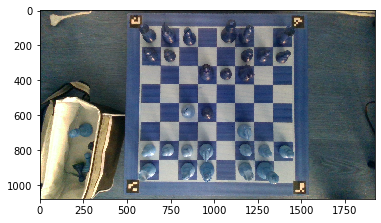

In [7]:
img = list(game.images)[move]["color"]
plt.imshow(img, interpolation='nearest')

In [8]:
corners = find_corners(game.images)
corners

array([[1442.5573  ,  102.56604 ],
       [ 583.46423 ,  101.864075],
       [1452.6666  ,  977.5987  ],
       [ 568.8668  ,  971.2807  ]], dtype=float32)

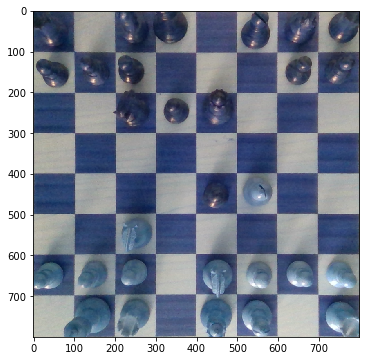

In [9]:
board = get_board(img, corners, margin=margin)
plt.figure(figsize=(6,6))
plt.imshow(board, interpolation='nearest')
plt.show()

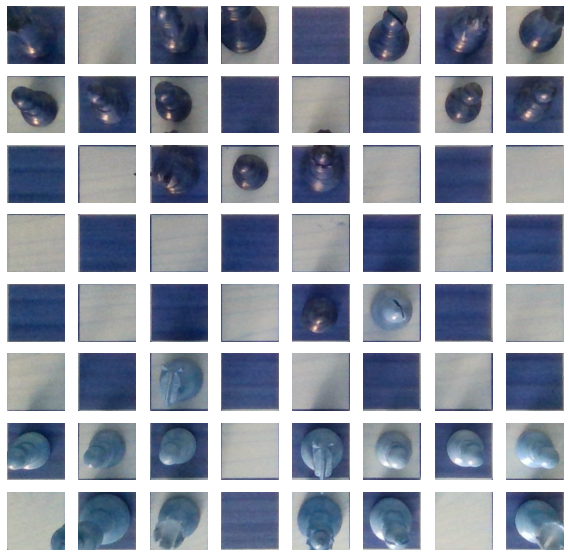

In [10]:
plt.figure(figsize=(10,10))
for i, square in enumerate(get_squares(board, margin=margin)):
    plt.subplot(8, 8, 64-i)
    plt.imshow(square)
    plt.axis("off")

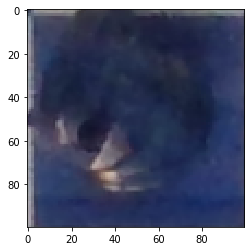

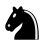

In [11]:
pgn_move = list(iter(game.pgn.mainline()))[move-2]
piece_img, piece = label_move(pgn_move, img, corners, margin=margin)
plt.imshow(piece_img, interpolation='nearest')
plt.show()
piece